# Mục Đích
> Trong phần này chúng ta sẽ xây dựng một model CNN từ đầu và cùng visualize kết quả của từng layer để có thể hiểu hơn được cách thức hoạt động của CNN. Một vài kiến thức sẽ được sử dụng lồng ghép với kiến thức trong Deeplearning.AI: Convolutional Neural Networks in TensorFlow.

In [ ]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import preprocessing
import matplotlib.pyplot as plt
import numpy as np

# Tạo dữ liệu

In [ ]:
path = '/home/ddpham/git/TFExam/data/sw/'
!ls {path}

test  train


In [ ]:
bs = 16
train_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/train'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(300, 300)
)
valid_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/test'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(300, 300)
)

Found 99 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


In [ ]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.

Failed to properly shut down NVML: Driver Not Loaded



# Tạo CNN cơ bản
> cấu trúc này được sử dụng lại từ khóa học: Convolutional Neural Networks in Tensorflow

In [ ]:
model = keras.Sequential([
    keras.layers.Conv2D(16, 3, activation='relu', input_shape=(300, 300, 3)) # filters=16, kernel size=3
    , keras.layers.MaxPooling2D(2, 2) # pooling size=2, strides=2
    , keras.layers.Conv2D(32, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Conv2D(64, 3, activation='relu')
    , keras.layers.MaxPooling2D(2, 2)
    , keras.layers.Flatten()
    , keras.layers.Dense(512, activation='relu')
    , keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

In [ ]:
optimizer = keras.optimizers.Adam(learning_rate=3e-4)
loss_func = keras.losses.BinaryCrossentropy()
model.compile(optimizer=optimizer, loss=loss_func, metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()])

In [ ]:
epochs=10
model.fit(train_ds, epochs=epochs, validation_data=valid_ds)

Epoch 1/10
7/7 [==============================] - 6s 264ms/step - loss: 23.0581 - accuracy: 0.5317 - precision: 0.4036 - recall: 0.5270 - val_loss: 3.8018 - val_accuracy: 0.5349 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 1s 87ms/step - loss: 3.0616 - accuracy: 0.5345 - precision: 0.4972 - recall: 0.4696 - val_loss: 4.2230 - val_accuracy: 0.5349 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 1s 87ms/step - loss: 2.6535 - accuracy: 0.5886 - precision: 0.4713 - recall: 0.1729 - val_loss: 0.9831 - val_accuracy: 0.5349 - val_precision: 0.5000 - val_recall: 0.8500
Epoch 4/10
7/7 [==============================] - 1s 86ms/step - loss: 0.5652 - accuracy: 0.7021 - precision: 0.6336 - recall: 0.8409 - val_loss: 0.9048 - val_accuracy: 0.5349 - val_precision: 0.5000 - val_recall: 0.1000
Epoch 5/10
7/7 [==============================] - 1s 86ms/step - loss: 0.4047 - accuracy: 0.8129 -

# Visualize các layers trong CNN
> Chúng ta muốn biết xem từng layers trong CNN thực sự đã làm gì với hình ảnh bằng cách visualize kết quả đầu ra của từng layer để hiểu được.

In [ ]:
# Chúng ta có 10 layers trong model trên cần xem kết quả đầu ra:
visualized_outputs = [layer.output for layer in model.layers[1:10]]

In [ ]:
# Lấy tên cho từng layer để tạo title ảnh:
layer_names = [layer.name for layer in model.layers[1:10]]
layer_names

['max_pooling2d',
 'conv2d_1',
 'max_pooling2d_1',
 'conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'conv2d_4',
 'max_pooling2d_4']

In [ ]:
# Tạo model để lấy kết quả visualize:
visualized_model = keras.Model(inputs=model.input, outputs=visualized_outputs)

In [ ]:
visualized_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_input (InputLayer)    [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0     

In [ ]:
def get_sample_image(valid_ds):
    i = 0
    for image, lable in valid_ds.take(1):
        j = np.random.randint(0, 16)
        sample_image = image[j]
        i +=1
        if i > 1: break
    return tf.expand_dims(sample_image, axis=0)

In [ ]:
sample_image = get_sample_image(valid_ds)

In [ ]:
feature_maps = visualized_model.predict(sample_image)

In [ ]:
len(feature_maps), feature_maps[0].shape

(9, (1, 149, 149, 16))

<ipython-input-17-1dae03e7c4e5>:8: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


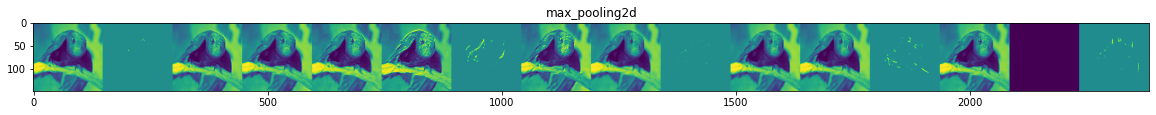

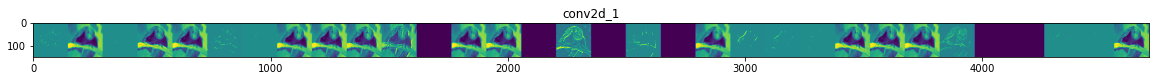

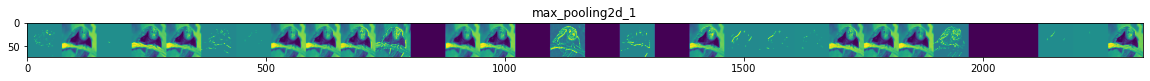

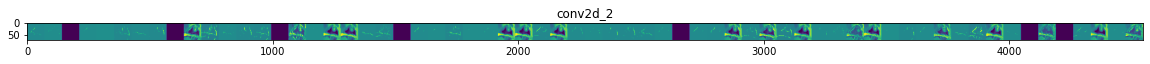

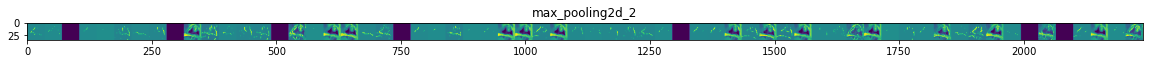

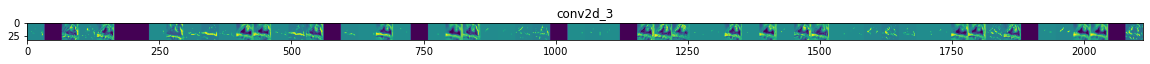

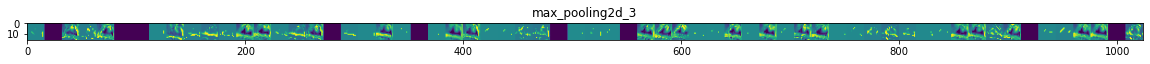

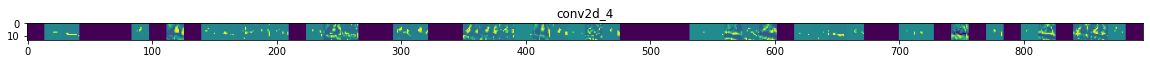

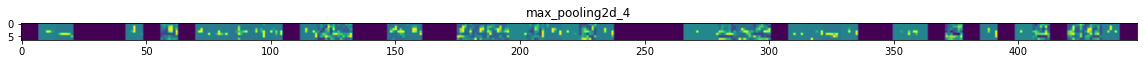

In [ ]:
for i, name, feature in zip(range(len(layer_names)), layer_names, feature_maps):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
    plt.figure(figsize=(scale * n_features, scale))
#     plt.figure(figsize=(30, 1))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

__Lưu ý:__
Code được copy từ khóa học: Deep learning, AI - TensorFlow Developer Professional Certificate

# Visualize với pretrained model

## Tạo dữ liệu

In [ ]:
bs = 16
train_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/train'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(460, 460)
)
valid_ds = preprocessing.image_dataset_from_directory(
    directory=f'{path}/test'
    , labels='inferred'
    , label_mode='binary'
    , batch_size=bs
    , image_size=(460, 460)
)

Found 99 files belonging to 2 classes.
Found 43 files belonging to 2 classes.


## Tạo biến đổi dữ liệu

In [ ]:
preprocessing_layer = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomCrop(224, 224)
    , keras.layers.experimental.preprocessing.RandomFlip('vertical')
])

In [ ]:
def preprocessing_image(x, y):
    x = preprocessing_layer(x, training=True)
    x = keras.applications.resnet50.preprocess_input(x)
    return (x, y)

In [ ]:
train_ds = train_ds.map(preprocessing_image)
valid_ds = valid_ds.map(preprocessing_image)

## Tạo model

In [ ]:
resnet = keras.applications.resnet50.ResNet50(include_top=False, input_shape=(224, 224, 3))
for layer in resnet.layers:
    layer.trainable=False

In [ ]:
flatten = keras.layers.Flatten(name='flatten')(resnet.output)
prediction = keras.layers.Dense(1, activation='sigmoid', name='prediction')(flatten)

In [ ]:
model = keras.Model(inputs=resnet.input, outputs=prediction)
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=3e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
model.fit(train_ds, epochs=10, validation_data=valid_ds)

Epoch 1/10
7/7 [==============================] - 7s 513ms/step - loss: 2.0785 - accuracy: 0.5137 - precision_1: 0.4701 - recall_1: 0.4726 - val_loss: 0.9739 - val_accuracy: 0.7674 - val_precision_1: 0.7500 - val_recall_1: 0.7500
Epoch 2/10
7/7 [==============================] - 2s 198ms/step - loss: 0.8770 - accuracy: 0.8020 - precision_1: 0.7499 - recall_1: 0.8773 - val_loss: 1.4962 - val_accuracy: 0.6744 - val_precision_1: 0.8000 - val_recall_1: 0.4000
Epoch 3/10
7/7 [==============================] - 2s 204ms/step - loss: 0.5487 - accuracy: 0.8900 - precision_1: 0.9292 - recall_1: 0.8372 - val_loss: 1.1792 - val_accuracy: 0.8372 - val_precision_1: 0.8421 - val_recall_1: 0.8000
Epoch 4/10
7/7 [==============================] - 2s 198ms/step - loss: 0.7085 - accuracy: 0.8791 - precision_1: 0.8512 - recall_1: 0.9060 - val_loss: 1.8363 - val_accuracy: 0.8140 - val_precision_1: 1.0000 - val_recall_1: 0.6000
Epoch 5/10
7/7 [==============================] - 2s 202ms/step - loss: 1.0381 -

## Visualize cho một vài layer

In [ ]:
# Chọn 5 layers làm ví dụ:
model_sample = []
model_names = []
for i in range(15):
    model_sample.append(model.layers[i].output)
    model_names.append(model.layers[i].name)
model_sample = keras.Model(inputs=model.input, outputs=model_sample)
model_sample.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

<ipython-input-27-b035a87eab3d>:10: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


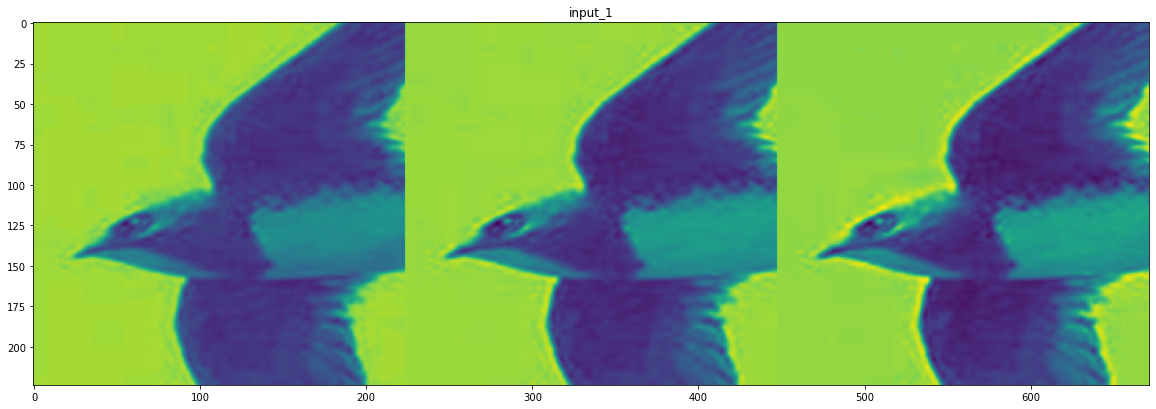

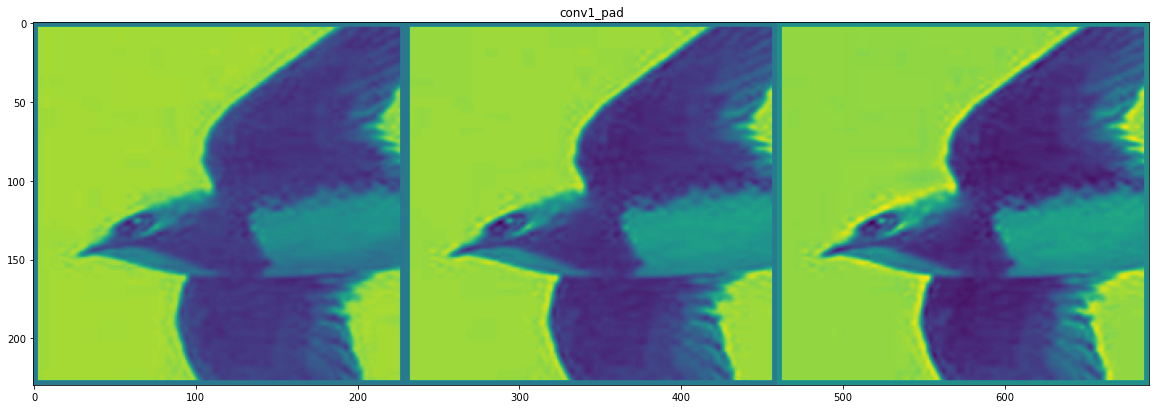

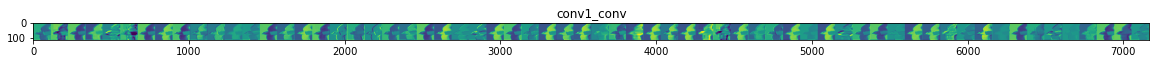

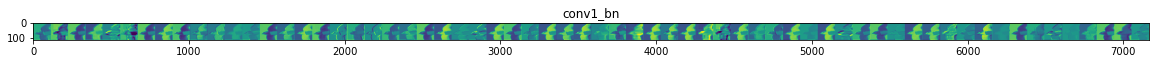

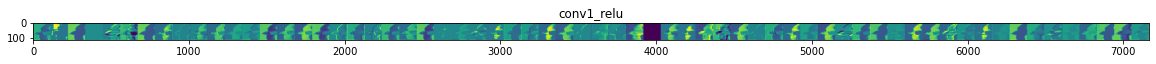

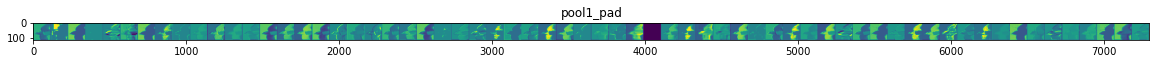

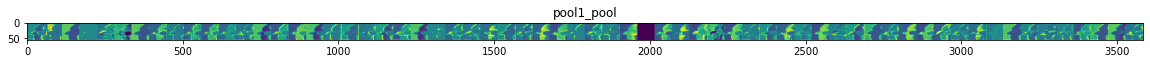

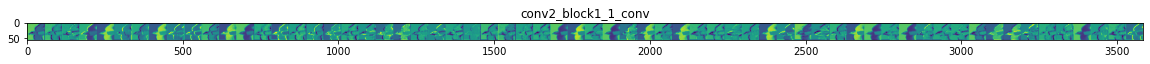

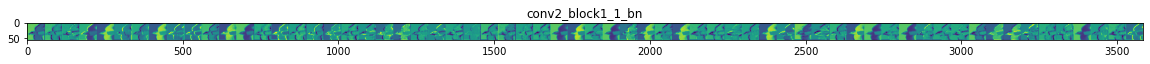

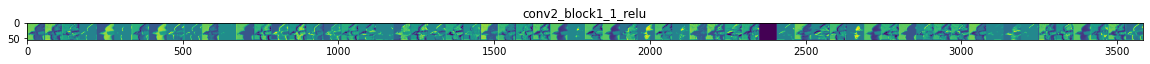

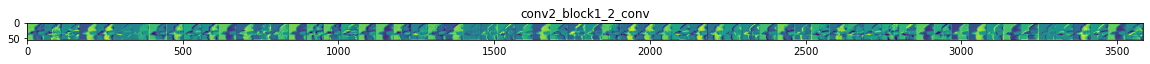

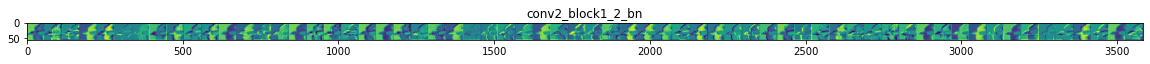

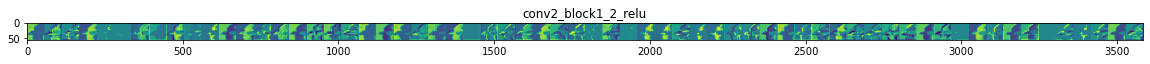

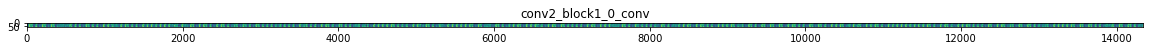

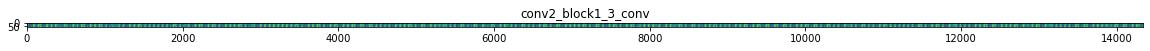

In [ ]:
sample_image = get_sample_image(train_ds)
sample_features = model_sample.predict(sample_image)
for name, feature in zip(model_names, sample_features):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
    plt.figure(figsize=(scale * n_features, scale))
#     plt.figure(figsize=(30, 1))
    plt.title(name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

<ipython-input-28-8ececc6b9e3a>:10: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


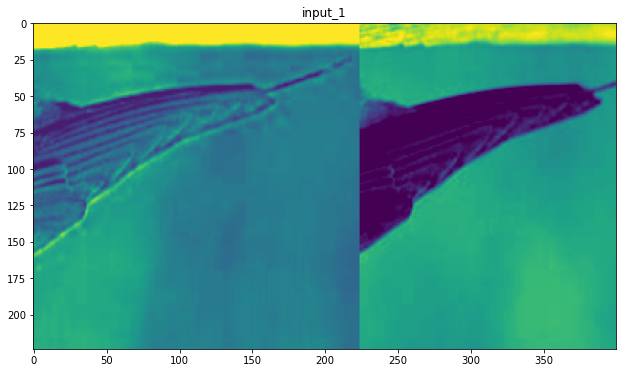

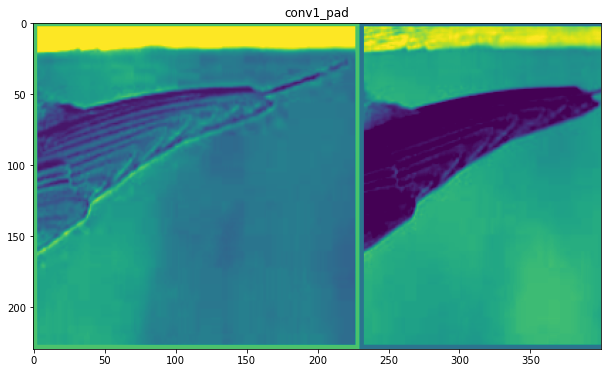

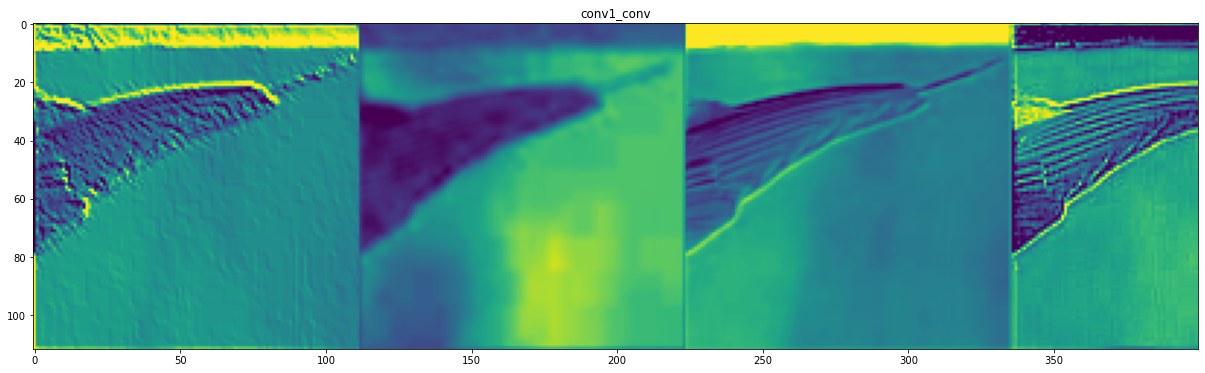

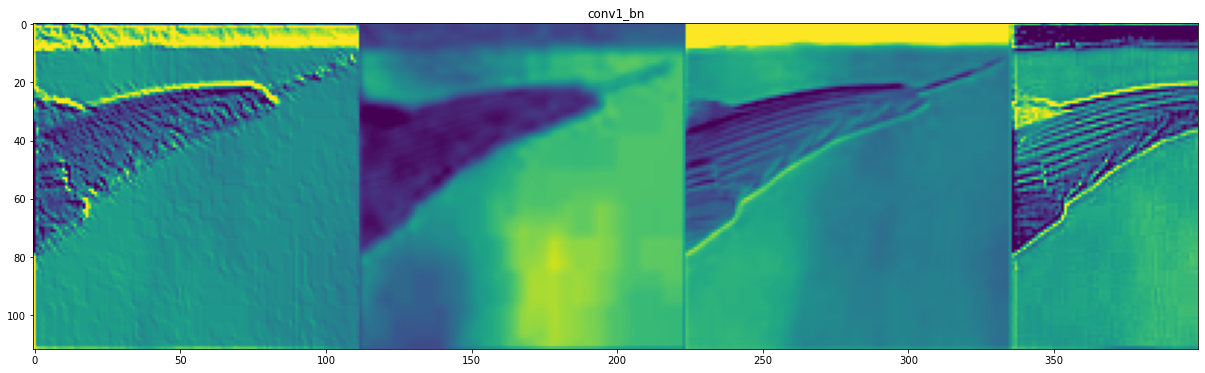

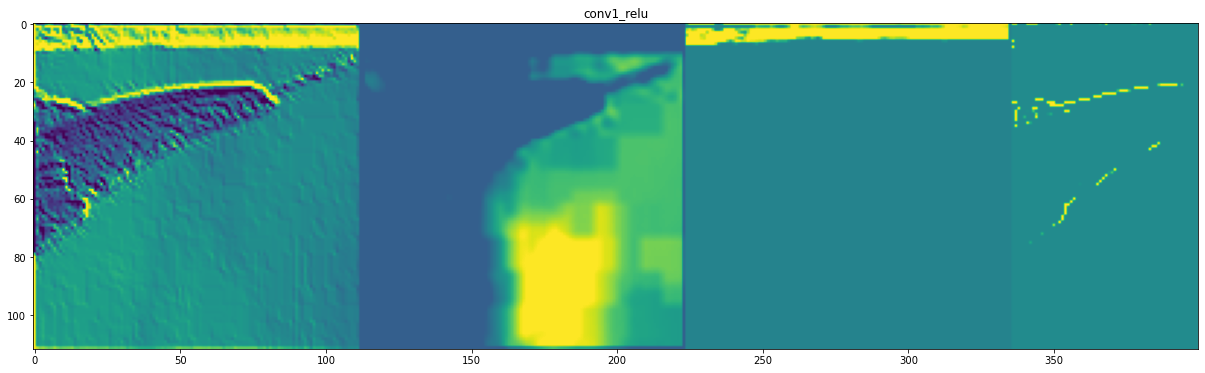

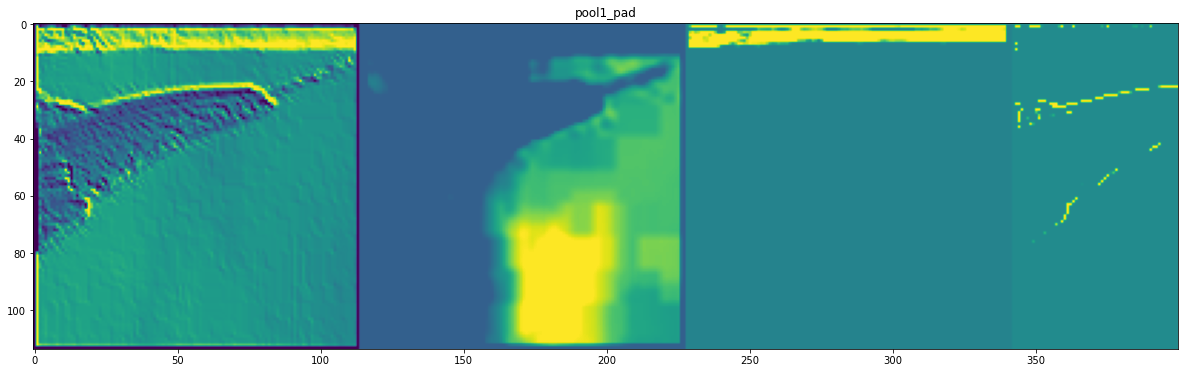

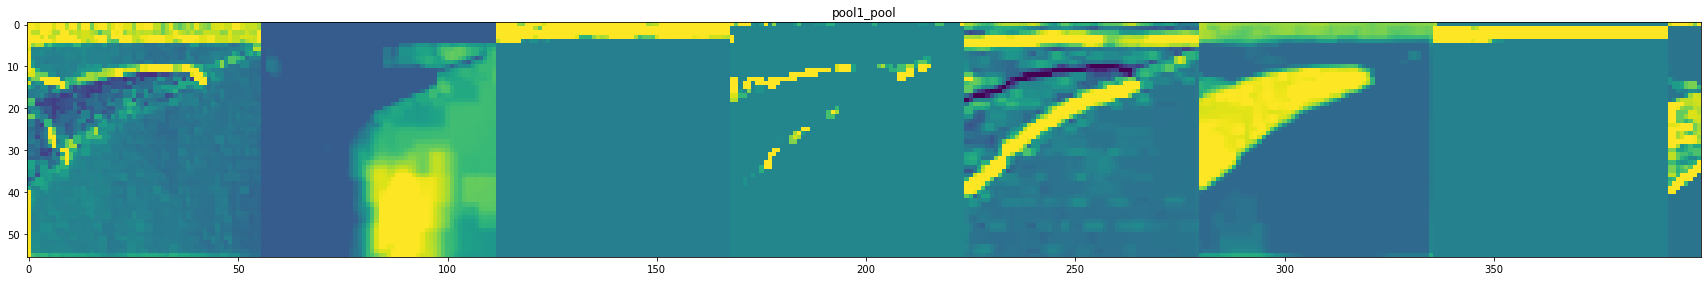

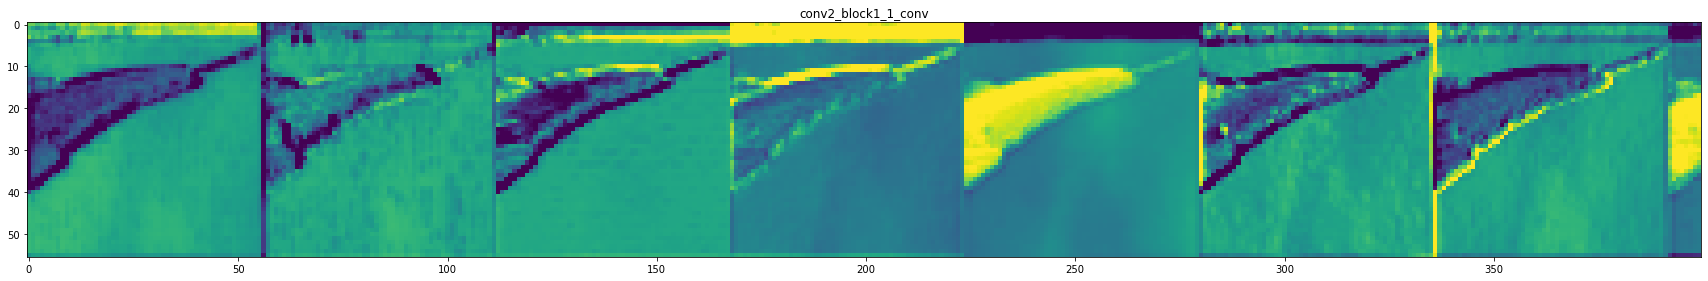

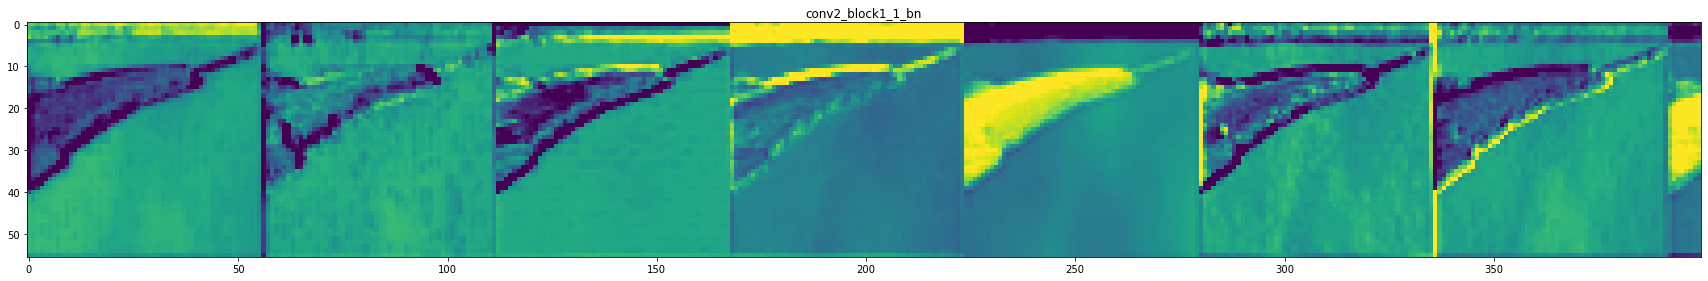

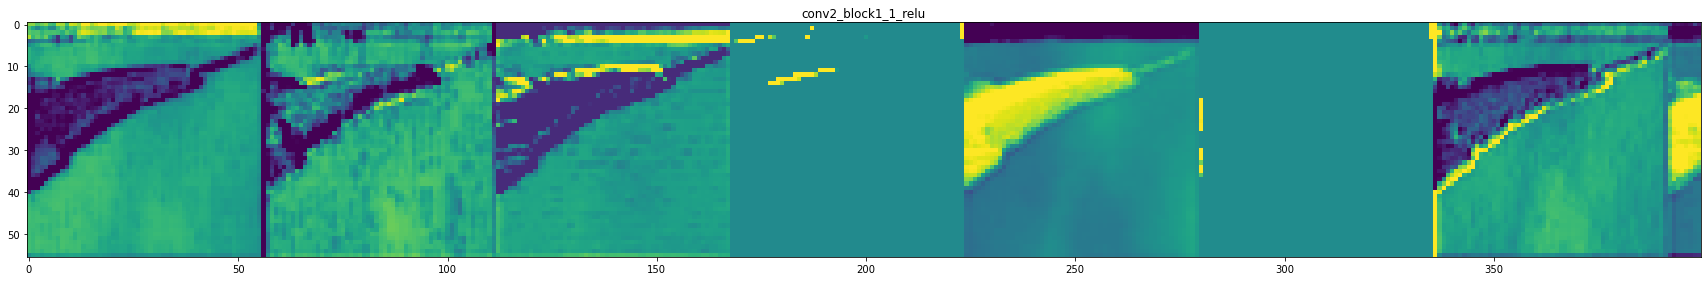

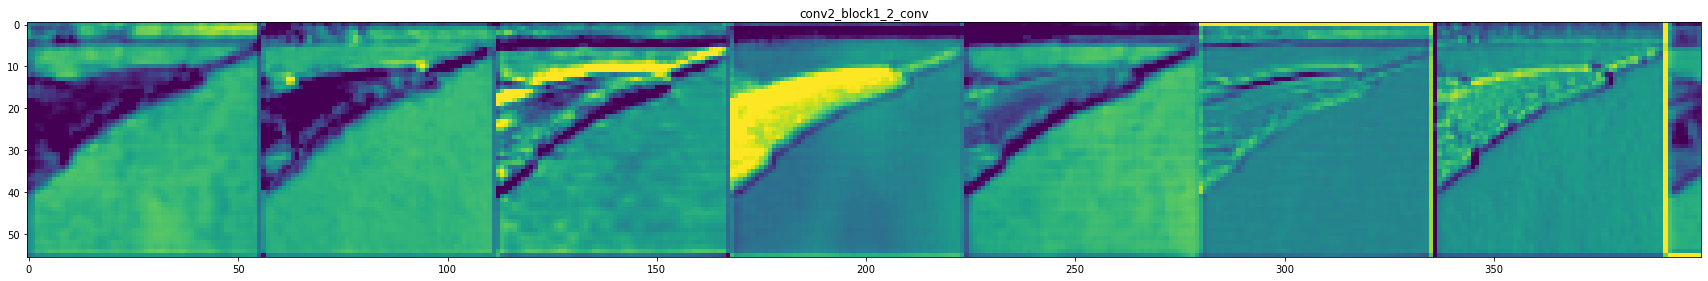

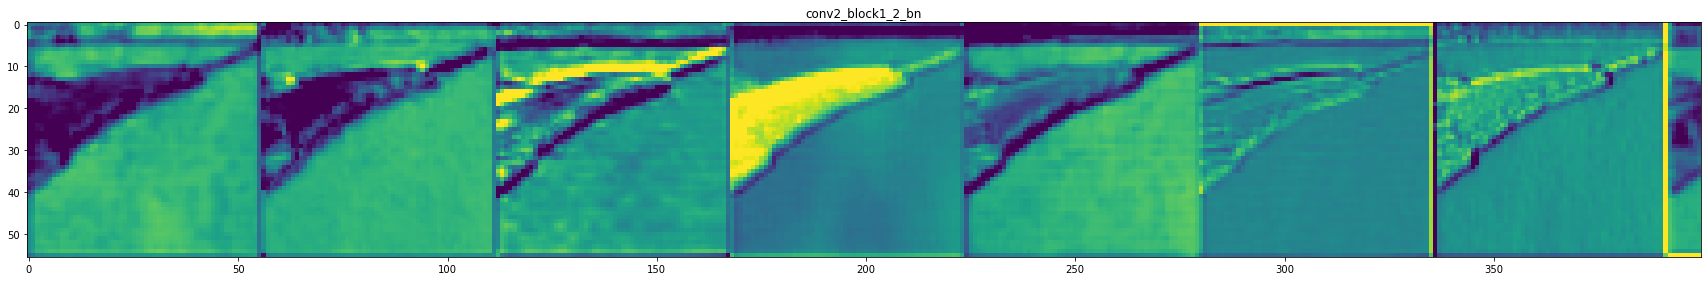

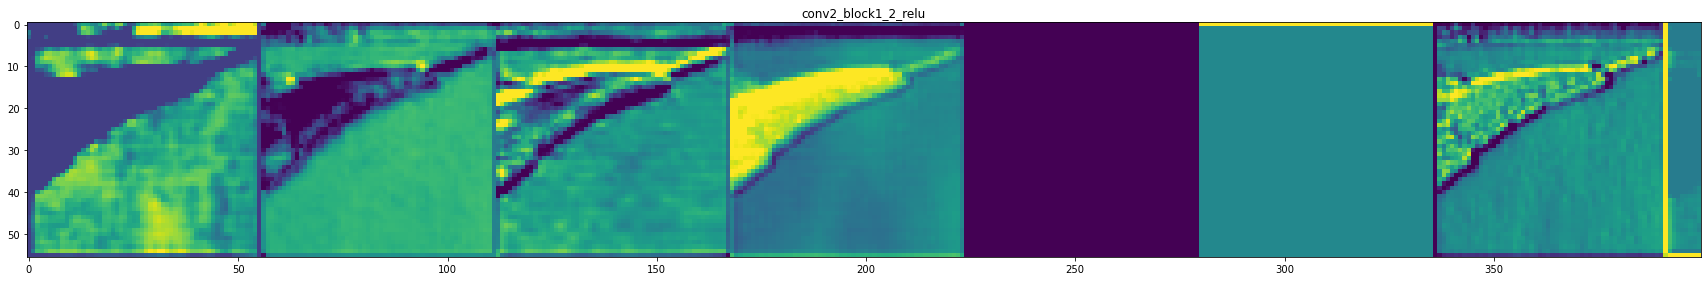

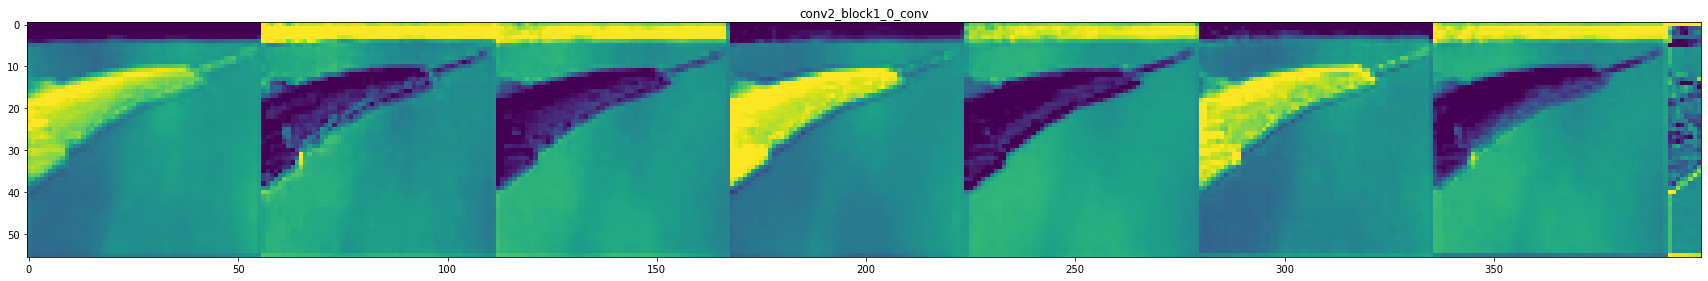

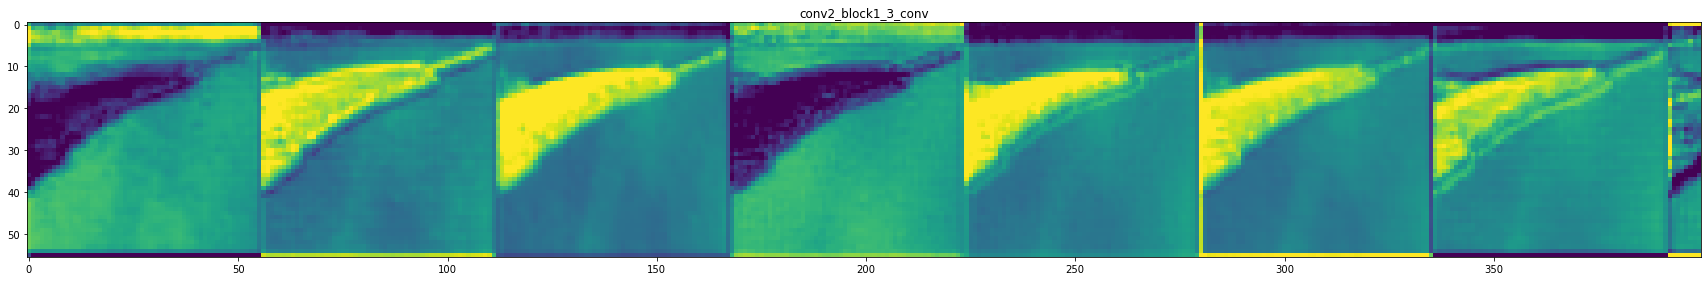

In [ ]:
sample_image = get_sample_image(train_ds)
sample_features = model_sample.predict(sample_image)
for i, name, feature in zip(range(len(model_names)), model_names, sample_features):
    n_features = feature.shape[-1]
    size = feature.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
        x = feature[0, :, :, i]
        x -= x.mean()
        x /= x.std()
        x *= 64
        x += 128
        x = np.clip(x, 0, 255).astype('uint8')
        display_grid[:, i * size: (i+1) * size] = x
    scale = 20./ n_features
#     plt.figure(figsize=(scale * n_features, scale))
    plt.figure(figsize=(30, 6))
    plt.title(name)
    plt.grid(False)
#         plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.imshow(display_grid[:, :400])